In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import cross_val_score
from sklearn  import svm

In [4]:
# Function to create prediction output in proper format
def create_output(predicted_classes,filename):
    ids = np.array([str(i) for i in range(0,len(predicted_classes))],dtype=object)
    ids = np.insert(ids,0,'Id')
    test_submit = np.insert(predicted_classes,0,'Category')
    test_submit = np.transpose(np.vstack((ids,test_submit)))
    
    with open('Predictions/'+filename+'.csv', 'w',newline='') as f:
        csv.writer(f).writerows(test_submit)

In [5]:
# Load Resized Images
train_images = np.load('ResizedTrain.npy',encoding='latin1')
test_images = np.load('ResizedTest.npy',encoding='latin1')
train_classes = np.loadtxt("train_labels.csv", delimiter=',',dtype=object, skiprows=1)[:,1]

# Linear SVM

In [6]:
def linearSVM(Cs, features, classes, nfolds=5):
    score_array = []
    
    for c in Cs:
        clf = LinearSVC(C=c)
        scores = cross_val_score(clf, features, classes, cv=nfolds)
        print("C ", c,": ",np.mean(scores))
        score_array.append([c,np.mean(scores)])
    
    return score_array       
        

### Preprocessed Data


In [38]:
# First hyper parameters tested for resized images
c = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,0.0001,0.01,0.1,1,10,100,1000,10000]
scores2 = linearSVM(c,train_images,train_classes)

C  1e-15 :  0.23942999975407248
C  1e-14 :  0.34532781798654133
C  1e-13 :  0.4268948618275704
C  1e-12 :  0.44241925222190936
C  1e-11 :  0.4176226473538617
C  1e-10 :  0.3648126399842525
C  1e-09 :  0.31522779476605944
C  1e-08 :  0.2688326074592281
C  1e-07 :  0.2792848367338112
C  1e-06 :  0.27389603887187447
C  1e-05 :  0.270561726999967
C  0.0001 :  0.26498078420956106
C  0.01 :  0.25879699956938473
C  0.1 :  0.2654988026877455
C  1 :  0.2725822602332045
C  10 :  0.2701369846136684
C  100 :  0.2670335790324817
C  1000 :  0.2653380603599467
C  10000 :  0.27240232080381777


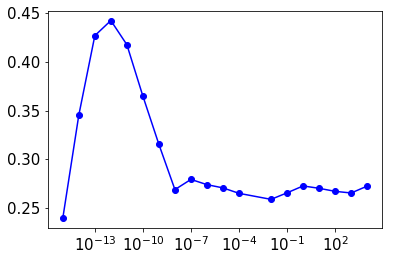

In [41]:
# Plot of first hyper parameter test
scores2 = np.array(scores2)
plt.semilogx(scores2[:,0],scores2[:,1], 'b-o')

In [42]:
# Second more precise hyper parameters tested for resized images
c = [1e-13,2e-13,3e-13,4e-13,5e-13,6e-13,7e-13,8e-13,9e-13,1e-12,2e-12,3e-12,4e-12,5e-12]
scores3 = linearSVM(c,train_images,train_classes)

C  1e-13 :  0.4268948618275704
C  2e-13 :  0.43869829196857363
C  3e-13 :  0.442908855646546
C  4e-13 :  0.44511743445031343
C  5e-13 :  0.44531861138051443
C  6e-13 :  0.44601816470587013
C  7e-13 :  0.4459195791573568
C  8e-13 :  0.4445187148746899
C  9e-13 :  0.4433172307294872
C  1e-12 :  0.44241925222190936
C  2e-12 :  0.43841135062469405
C  3e-12 :  0.4338137343443088
C  4e-12 :  0.43201864354499964
C  5e-12 :  0.429219724069349


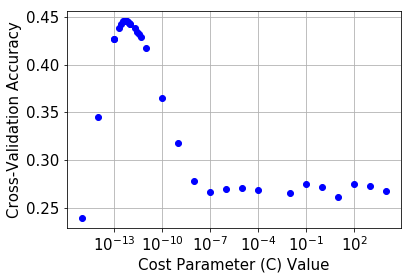

In [58]:
# Plot all hyperparameters tested on resized images
scores = np.vstack((scores3,scores2))
plt.semilogx(scores[:,0],scores[:,1], 'bo')
plt.xlabel("Cost Parameter (C) Value")
plt.ylabel("Cross-Validation Accuracy")
plt.rcParams.update({'font.size': 15})
plt.grid()

In [29]:
# Training linear SVM with best hyper parameter and predicting test classes
clf = LinearSVC(C=6e-13)
clf.fit(train_images, train_classes)
SVM_prediction = clf.predict(test_images)

In [30]:
create_output(SVM_prediction,"finalSVM")

array(['panda', 'penguin', 'moustache', ..., 'rifle', 'pineapple', 'mug'],
      dtype=object)

### Unprocessed Data (for comparison)

In [7]:
# Load unprocessed data
train_images1 = np.load('train_images.npy',encoding='latin1')[:,1]
test_images1 = np.load('test_images.npy',encoding='latin1')[:,1]

In [ ]:
# Shape images to work with Linear SVM function
reshaped_train = []
reshaped_test = []

for arr in train_images1:
    reshaped_train.append(arr)
for arr in test_images1:
    reshaped_test.append(arr)
    
reshaped_train = np.array(reshaped_train)
reshaped_test = np.array(reshaped_test)

In [13]:
# Test various hyper-parameters on unprocessed data
c = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,0.0001,0.01,0.1,1,10,100,1000,10000]
scorespre2 = linearSVM(c,reshaped_train,train_classes)

C  1e-15 :  0.05710067742696967
C  1e-14 :  0.05710067742696967
C  1e-13 :  0.05710067742696967
C  1e-12 :  0.05710067742696967
C  1e-11 :  0.05710067742696967
C  1e-10 :  0.055894422894335195
C  1e-09 :  0.04859423630367814
C  1e-08 :  0.043293131621160386
C  1e-07 :  0.038790070942127754
C  1e-06 :  0.03788631008395575
C  1e-05 :  0.038285616756688116
C  0.0001 :  0.03838526975866302
C  0.01 :  0.03838526975866302
C  0.1 :  0.03838526975866302
C  1 :  0.03838526975866302
C  10 :  0.03838526975866302
C  100 :  0.03838526975866302
C  1000 :  0.03838526975866302
C  10000 :  0.03838526975866302


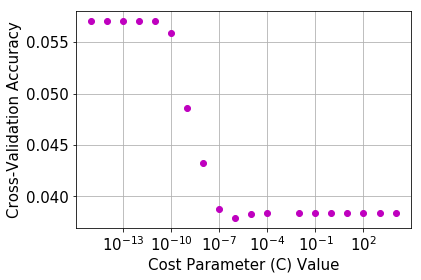

In [24]:
# Plot performance
plt.semilogx(np.array(scorespre2)[:,0],np.array(scorespre2)[:,1], 'mo')
plt.xlabel("Cost Parameter (C) Value")
plt.ylabel("Cross-Validation Accuracy")
plt.rcParams.update({'font.size': 15})
plt.grid()

In [43]:
# Train with best hyperparameter
clf = LinearSVC(C=6e-13)
clf.fit(np.array(reshaped_train), train_classes)
SVM_prediction_not_pre = clf.predict(reshaped_test)

In [35]:
# Create output
create_output(SVM_prediction_not_pre, "SVM_unprocessed")